In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/star_classification.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [6]:
df = df.drop(["obj_ID","run_ID","rerun_ID","cam_col","field_ID","spec_obj_ID","plate"], axis=1)
df = df[df["class"] != "QSO"]

In [7]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["class"] = LE.fit_transform(df["class"])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("class", axis = 1),
    df["class"],
    test_size = 0.2
    )

In [9]:
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4732142857142857, 0.9285714285714286, 'x[7] <= 0.004\ngini = 0.39\nsamples = 64831\nvalue = [47602, 17229]'),
 Text(0.4375, 0.7857142857142857, 'x[7] <= -0.0\ngini = 0.046\nsamples = 17648\nvalue = [419, 17229]'),
 Text(0.45535714285714285, 0.8571428571428572, 'True  '),
 Text(0.19642857142857142, 0.6428571428571429, 'x[7] <= -0.004\ngini = 0.005\nsamples = 10958\nvalue = [29, 10929]'),
 Text(0.16071428571428573, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.23214285714285715, 0.5, 'x[5] <= 22.206\ngini = 0.004\nsamples = 10952\nvalue = [23, 10929]'),
 Text(0.14285714285714285, 0.35714285714285715, 'x[6] <= 21.509\ngini = 0.003\nsamples = 10901\nvalue = [19, 10882]'),
 Text(0.07142857142857142, 0.21428571428571427, 'x[8] <= 51791.5\ngini = 0.003\nsamples = 10582\nvalue = [15.0, 10567.0]'),
 Text(0.03571428571428571, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.21428571428571427, 

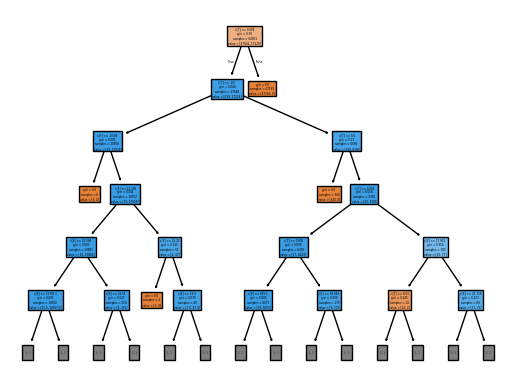

In [10]:
from sklearn.tree import plot_tree
plot_tree(Dt, filled = True, max_depth=5)